# Target Backends

## Set target

Two options to set the target:

1. Define the target when running the program:
```bash
python3 program.py [...] --target <target_name>
```

2. Target can be defined in the application code:
`cudaq.set_target("target_name")` . Then, to run the program, drop the target flag:
`python3 program.py [...]`


## Target name

1. State vector simulators:
    - Single-GPU (Default if an NVIDIA GPU and CUDA runtime libraries are available): `python3 program.py [...] --target nvidia`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target nvidia --target-option=mgpu`
2. Tensor network simulator:
    - Single-GPU: `python3 program.py [...] --target tensornet`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target tensornet`
3. Matrix Product State:
    - Only supports single-GPU simulation: `python3 program.py [...] --target tensornet-mps`
4. NVIDIA Quantum Cloud
    - Run any of the above backends using NVIDIA-provided cloud GPUs (early access only). To learn more, visit [this page](https://www.nvidia.com/en-us/solutions/quantum-computing/cloud/).
    - E.g. `cudaq.set_target('nvqc', backend='tensornet')`
5. Quantum hardware backend (to learn more, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/hardware.html)):
    - ```cudaq.set_target('QPU_name')```. QPU_name could be `ionq`, `quantinuum`, `iqm`, `oqc`, ...etc.


To learn more about CUDA-Q backends, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/backends.html)

In [1]:
import cudaq
from time import perf_counter

In [2]:
@cudaq.kernel
def ghz(n: int):
    q = cudaq.qvector(n)
    h(q[0])

    for i in range(1, n):
        cx(q[0], q[i])

In [3]:
# Run with CPU

cudaq.set_target("qpp-cpu")

counts = cudaq.sample(ghz, 10)
print(counts)

{ 0000000000:515 1111111111:485 }



Statevector simulation tiem scales exponentially.

In [4]:
cudaq.set_target("qpp-cpu")

cpu_times = []
for n in range(10, 22):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    cpu_times.append((n, end - start))

print(cpu_times)

[(10, 0.0013061165809631348), (11, 0.001062631607055664), (12, 0.0016064569354057312), (13, 0.0018215291202068329), (14, 0.002770930528640747), (15, 0.004936769604682922), (16, 0.01007382944226265), (17, 0.022454407066106796), (18, 0.04882889613509178), (19, 0.10831882804632187), (20, 0.22663861140608788), (21, 0.6565521284937859)]


Simulation with GPU is also exponential, but faster than CPUs for large number of qubits:

In [5]:
# Use GPU
cudaq.set_target("nvidia")

gpu_times = []
for n in range(10, 32):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    gpu_times.append((n, end - start))

print(gpu_times)

[(10, 0.027761921286582947), (11, 0.002786509692668915), (12, 0.0028105340898036957), (13, 0.0026717595756053925), (14, 0.0026606395840644836), (15, 0.003180127590894699), (16, 0.037262581288814545), (17, 0.006582587957382202), (18, 0.0033148862421512604), (19, 0.003248177468776703), (20, 0.0031191743910312653), (21, 0.0032068900763988495), (22, 0.0037196315824985504), (23, 0.00418052077293396), (24, 0.009553790092468262), (25, 0.037110336124897), (26, 0.014895003288984299), (27, 0.024457015097141266), (28, 0.0471811518073082), (29, 0.09365806356072426), (30, 0.22890816628932953), (31, 0.39939553663134575)]


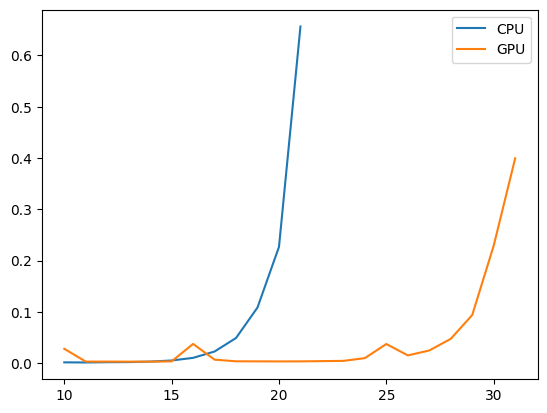

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.plot([i[0] for i in cpu_times], ([i[1] for i in cpu_times]), label="CPU")
plt.plot([i[0] for i in gpu_times], ([i[1] for i in gpu_times]), label="GPU")
plt.legend()
plt.show()

In [7]:
### Version information
print(cudaq.__version__)

CUDA-Q Version  (https://github.com/NVIDIA/cuda-quantum 0876ddbaef1e01d6e45a90a633077c5d04f90bf6)
